In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('Customer_data.csv')

# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


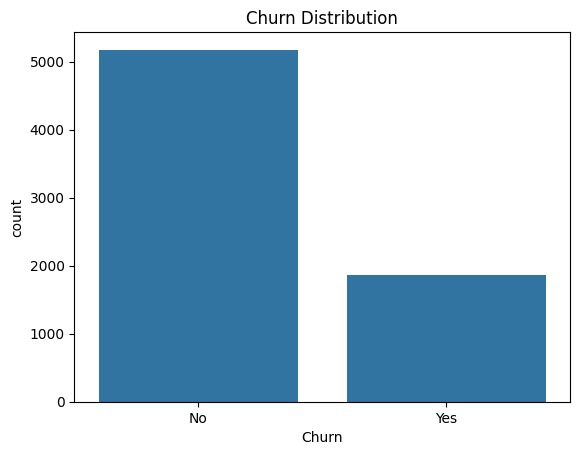

In [3]:
# Get basic information about the dataset
data.info()

# Summary statistics for numerical features
data.describe()

# Visualize the distribution of target variable (Churn)
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

In [4]:
# Check for missing values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
# Drop rows with missing values in the dataset directly
data.dropna(inplace=True)

In [6]:
# Check for missing values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
features = ['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod',
    'PaperlessBilling', 'Dependents', 'Partner', 'SeniorCitizen',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService', 'Churn']

# Keep only the most relevant features
data = data[features]

In [8]:
data.head()

,tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,PaperlessBilling,Dependents,Partner,SeniorCitizen,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,Churn
0,1,Month-to-month,29.85,29.85,Electronic check,Yes,No,Yes,0,DSL,No,Yes,No,No,No,No,No,No
1,34,One year,56.95,1889.50,Mailed check,No,No,No,0,DSL,Yes,No,Yes,No,No,No,Yes,No
2,2,Month-to-month,53.85,108.15,Mailed check,Yes,No,No,0,DSL,Yes,Yes,No,No,No,No,Yes,Yes
3,45,One year,42.30,1840.75,Bank transfer (automatic),No,No,No,0,DSL,Yes,No,Yes,Yes,No,No,No,No
4,2,Month-to-month,70.70,151.65,Electronic check,Yes,No,No,0,Fiber optic,No,No,No,No,No,No,Yes,Yes


In [9]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
data['Contract'] = label_encoder.fit_transform(data['Contract'])  # Month-to-month=0, One year=1, Two year=2
data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])  # Electronic check=0, Mailed check=1, etc.
data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])  # No=0, Yes=1
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])  # No=0, Yes=1
data['Partner'] = label_encoder.fit_transform(data['Partner'])  # No=0, Yes=1
data['InternetService'] = label_encoder.fit_transform(data['InternetService'])  # DSL=0, Fiber optic=1, No=2
data['OnlineSecurity'] = label_encoder.fit_transform(data['OnlineSecurity'])  # No=0, Yes=1
data['OnlineBackup'] = label_encoder.fit_transform(data['OnlineBackup'])  # No=0, Yes=1
data['DeviceProtection'] = label_encoder.fit_transform(data['DeviceProtection'])  # No=0, Yes=1
data['TechSupport'] = label_encoder.fit_transform(data['TechSupport'])  # No=0, Yes=1
data['StreamingTV'] = label_encoder.fit_transform(data['StreamingTV'])  # No=0, Yes=1
data['StreamingMovies'] = label_encoder.fit_transform(data['StreamingMovies'])  # No=0, Yes=1
data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])  # No=0, Yes=1

# For the target column "Churn"
data['Churn'] = label_encoder.fit_transform(data['Churn'])  # No=0, Yes=1

In [10]:
data.head()

,tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,PaperlessBilling,Dependents,Partner,SeniorCitizen,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,Churn
0,1,0,29.85,29.85,2,1,0,1,0,0,0,2,0,0,0,0,0,0
1,34,1,56.95,1889.50,3,0,0,0,0,0,2,0,2,0,0,0,1,0
2,2,0,53.85,108.15,3,1,0,0,0,0,2,2,0,0,0,0,1,1
3,45,1,42.30,1840.75,0,0,0,0,0,0,2,0,2,2,0,0,0,0
4,2,0,70.70,151.65,2,1,0,0,0,1,0,0,0,0,0,0,1,1


In [11]:
# Prepare features (X) and target (y)
X = data.drop(['Churn'], axis=1)  # Drop 'Churn' columns
y = data['Churn']  # Target variable
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape

(7032, 17)

In [12]:
# Scale the numeric features (important for Logistic Regression)
scaler = StandardScaler()

# Apply scaling to the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = log_reg_model.predict(X_test_scaled)

Accuracy: 0.79
Precision: 0.62
Recall: 0.49
F1 Score: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



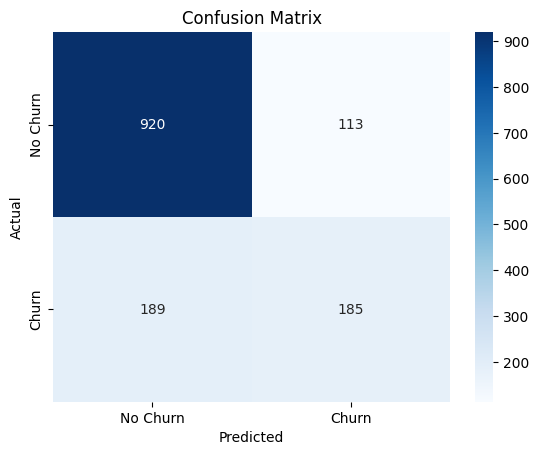

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
def predict_churn(log_reg_model, scaler, label_encoder):
    # Collect user input based on the relevant features
    tenure = int(input("Enter tenure (Number of months with the company): "))

    contract = input("Enter contract type (Month-to-month/One year/Two year): ")
    contract = 0 if contract.lower() == "month-to-month" else (1 if contract.lower() == "one year" else 2)

    monthly_charges = float(input("Enter monthly charges (USD): "))
    total_charges = float(input("Enter total charges (USD): "))

    payment_method = input("Enter payment method (Electronic check/Mailed check/Bank transfer): ")
    payment_method = 0 if payment_method.lower() == "electronic check" else (1 if payment_method.lower() == "mailed check" else 2)

    paperless_billing = input("Do you use paperless billing? (Yes/No): ")
    paperless_billing = 1 if paperless_billing.lower() == "yes" else 0

    dependents = input("Do you have dependents? (Yes/No): ")
    dependents = 1 if dependents.lower() == "yes" else 0

    partner = input("Do you have a partner? (Yes/No): ")
    partner = 1 if partner.lower() == "yes" else 0

    senior_citizen = int(input("Enter senior citizen status (0: No, 1: Yes): "))

    internet_service = input("Enter internet service (DSL/Fiber optic/No): ")
    internet_service = 0 if internet_service.lower() == "dsl" else (1 if internet_service.lower() == "fiber optic" else 2)

    online_security = input("Do you have online security? (Yes/No): ")
    online_security = 1 if online_security.lower() == "yes" else 0

    online_backup = input("Do you have online backup? (Yes/No): ")
    online_backup = 1 if online_backup.lower() == "yes" else 0

    device_protection = input("Do you have device protection? (Yes/No): ")
    device_protection = 1 if device_protection.lower() == "yes" else 0

    tech_support = input("Do you have tech support? (Yes/No): ")
    tech_support = 1 if tech_support.lower() == "yes" else 0

    streaming_tv = input("Do you have streaming TV? (Yes/No): ")
    streaming_tv = 1 if streaming_tv.lower() == "yes" else 0

    streaming_movies = input("Do you have streaming movies? (Yes/No): ")
    streaming_movies = 1 if streaming_movies.lower() == "yes" else 0

    phone_service = input("Do you have phone service? (Yes/No): ")
    phone_service = 1 if phone_service.lower() == "yes" else 0

   # Create a DataFrame with user input for prediction
    user_data = pd.DataFrame([[tenure, contract, monthly_charges, total_charges, payment_method, paperless_billing,
                               dependents, partner, senior_citizen, internet_service, online_security,
                               online_backup, device_protection, tech_support, streaming_tv, streaming_movies,
                               phone_service]],
                             columns=X.columns)


    # Apply scaling to the user input using the same scaler
    user_data_scaled = scaler.transform(user_data)

    # Predict churn
    prediction = log_reg_model.predict(user_data_scaled)

    # Output the prediction
    if prediction == 0:
        print("\n\t\tThe customer is predicted to stay (No churn).")
    else:
        print("\n\t\tThe customer is predicted to churn (Yes).")

# Example usage:
# Assuming that the log_reg_model, scaler, and label_encoders have been trained and initialized
predict_churn(log_reg_model, scaler, label_encoder)


Enter tenure (Number of months with the company): 12
Enter contract type (Month-to-month/One year/Two year): One year
Enter monthly charges (USD): 45.60
Enter total charges (USD): 540.00
Enter payment method (Electronic check/Mailed check/Bank transfer): Electronic check
Do you use paperless billing? (Yes/No): Yes
Do you have dependents? (Yes/No): No
Do you have a partner? (Yes/No): Yes
Enter senior citizen status (0: No, 1: Yes): 0
Enter internet service (DSL/Fiber optic/No): Fiber optic
Do you have online security? (Yes/No): Yes
Do you have online backup? (Yes/No): No
Do you have device protection? (Yes/No): Yes
Do you have tech support? (Yes/No): Yes
Do you have streaming TV? (Yes/No): Yes
Do you have streaming movies? (Yes/No): No
Do you have phone service? (Yes/No): Yes

		The customer is predicted to stay (No churn).
